In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pyemma

In [2]:
dtrajs = list(np.load('dtrajs_100.npy'))

In [6]:
its = pyemma.msm.its(dtrajs, nits=10)

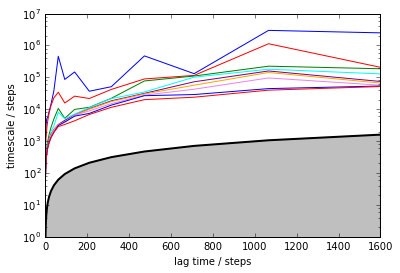

In [7]:
pyemma.plots.plot_implied_timescales(its)

In [8]:
msm = pyemma.msm.estimate_markov_model(dtrajs, lag=400)

In [9]:
msm.active_count_fraction

0.9957478643131662

In [10]:
msm.active_state_fraction

0.97

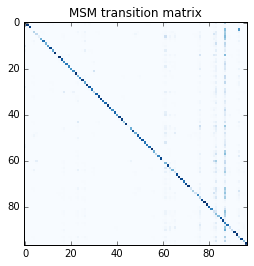

In [11]:
plt.imshow(msm.P,interpolation='none',cmap='Blues')
plt.title('MSM transition matrix')

In [12]:
np.trace(msm.P)

63.54478587878863

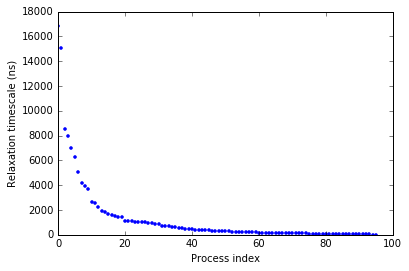

In [13]:
plt.plot(msm.timescales()/4,'.')
plt.xlabel('Process index')
plt.ylabel('Relaxation timescale (ns)')

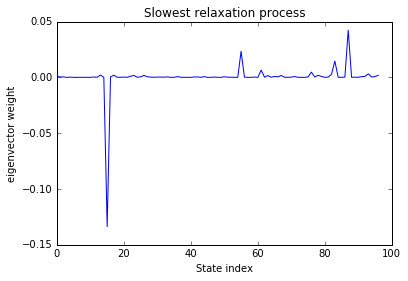

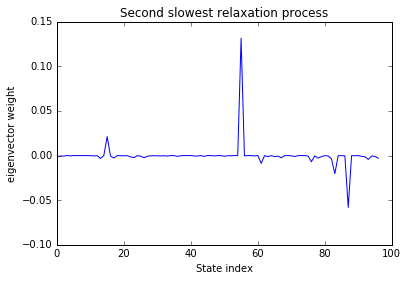

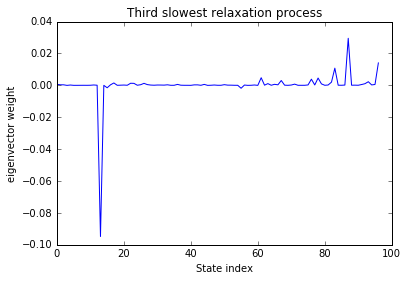

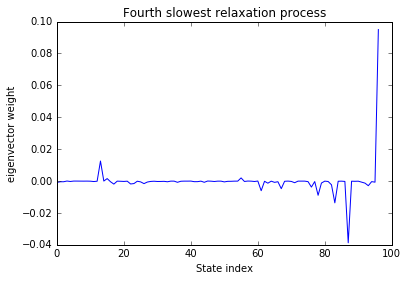

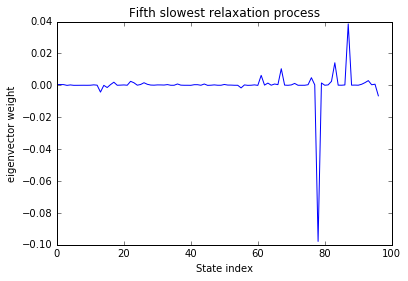

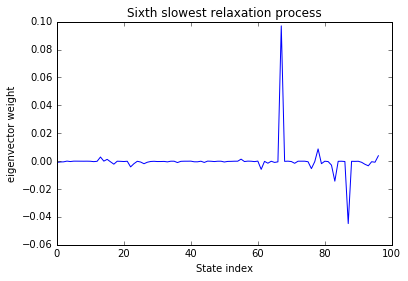

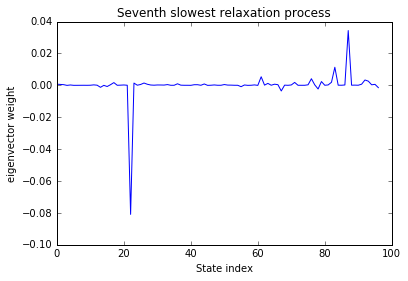

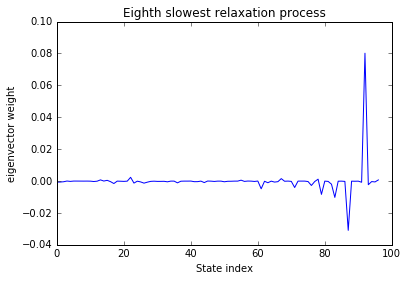

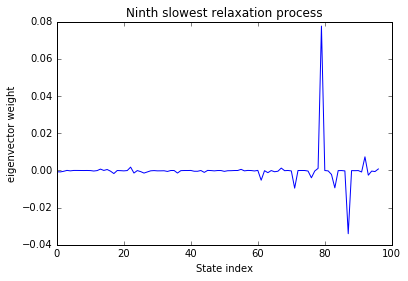

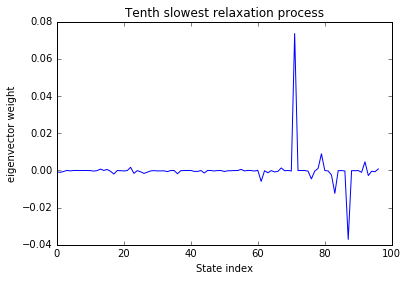

In [14]:
# let's plot the top 10 -- these will give us some interesting states to look at
names = 'Zeroth First Second Third Fourth Fifth Sixth Seventh Eighth Ninth Tenth'.split()
plt.plot(msm.eigenvectors_left()[1])
plt.xlabel('State index')
plt.ylabel('eigenvector weight')
plt.title('Slowest relaxation process')
for i in range(2,11):
    plt.figure()
    plt.plot(msm.eigenvectors_left()[i])
    plt.xlabel('State index')
    plt.ylabel('eigenvector weight')
    plt.title('{0} slowest relaxation process'.format(names[i]))

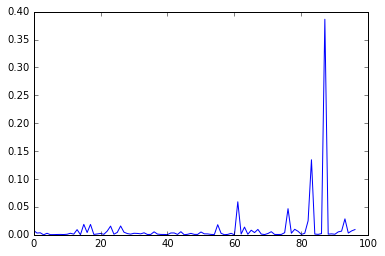

In [39]:
plt.plot(msm.stationary_distribution)

In [31]:
hmm = msm.coarse_grain(3)

In [32]:
hmm

MaximumLikelihoodHMSM(accuracy=0.001, connectivity=None, dt_traj='1 step',
           lag=400, maxit=1000, mincount_connectivity=0.333333333333,
           msm_init=MaximumLikelihoodMSM(connectivity='largest', count_mode='sliding',
           dt_traj='1 step', lag=400, maxerr=1e-08, maxiter=1000000,
           reversible=True, sparse=False, statdist_constraint=None),
           nstates=3, observe_nonempty=True, reversible=True,
           separate=None, stationary=False, stride=1)

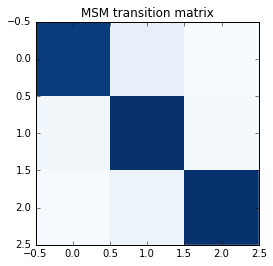

In [33]:
plt.imshow(hmm.P,interpolation='none',cmap='Blues')
plt.title('MSM transition matrix')

In [34]:
hmm.eigenvectors_left()

array([[ 0.15787353,  0.62794657,  0.2141799 ],
       [-0.15176587, -0.25020417,  0.40197004],
       [-0.33153673,  0.41355477, -0.08201804]])

In [38]:
hmm.timescales() / 4

array([ 1959.97931354,   923.71256457])

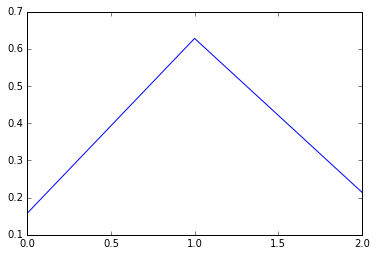

In [40]:
plt.plot(hmm.stationary_distribution)

In [48]:
samples = hmm.sample_by_observation_probabilities(10)

In [49]:
samples

array([ array([[   77,  7893],
       [  425,  2526],
       [   64,  6868],
       [  487,  1206],
       [  601,   174],
       [  158,   335],
       [  967,  1278],
       [  927, 11585],
       [  364,  5866],
       [  446,  7242]]),
       array([[  362,  2793],
       [  598,  5381],
       [  774, 10455],
       [   50,   565],
       [  898,  4554],
       [  671,   665],
       [  240,   494],
       [   98,  7704],
       [   48, 13568],
       [  744,  6135]]),
       array([[  521,  4125],
       [  323, 14086],
       [  135,  3586],
       [  907,  8968],
       [  812,  3018],
       [  348, 13804],
       [  719,  6764],
       [  266,  6447],
       [  340,  3852],
       [  362,  6062]])], dtype=object)

(<matplotlib.figure.Figure at 0x11949cf10>, array([[ 1.        ,  0.36906968],
        [ 0.        ,  0.        ],
        [ 0.4187967 ,  0.40279584]]))

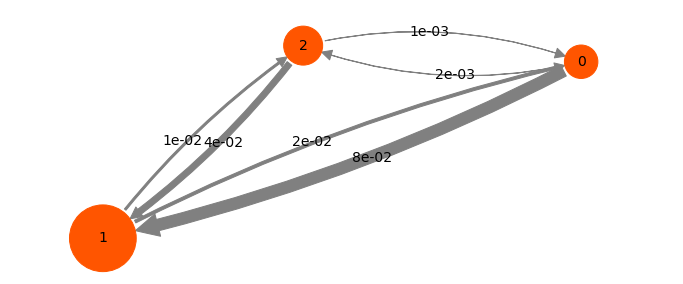

In [50]:
pyemma.plots.plot_markov_model(hmm)

In [55]:
import msmbuilder

In [56]:
np.save('10samples_hmm', samples)

In [57]:
pwd

u'/Users/rafalpwiewiora/repos/MSM_play/josh_work/unitime'